In [31]:
# import basic packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import scikit-learn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR

# import xgb
import xgboost as xgb

In [ ]:
# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice

# Create X (After completing the exercise, you can return to modify this line!)
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

# Nulls, Nan, Duplicates

In [4]:
print(home_data.isnull().sum().sort_values(ascending=False))
print("")
print(home_data.isna().sum().sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


In [6]:
# Find duplicated rows
print(home_data.duplicated().value_counts())

False    1460
dtype: int64


In [8]:
## drop unused columns
home_data_clean = home_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                                 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1',
                                 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond',
                                 'BsmtFinType2', 'Heating', 'Electrical', 'LowQualFinSF', 'Functional',
                                 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'], 
                                        axis=1)

In [10]:
print(home_data_clean.isnull().sum().sort_values(ascending=False))

LotFrontage      259
GarageFinish      81
GarageType        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
Id                 0
BsmtFullBath       0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleCondition      0
BsmtHalfBath       0
CentralAir         0
GrLivArea          0
RoofStyle          0
MSZoning           0
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
2ndFlrSF           0
Exterior2nd        0
ExterQual    

In [12]:
def replace_nan_with_mode(df, column_name):
    """
    Replaces NaN values in a categorical column with the mode.

    Args:
        df (pandas.DataFrame)
        column_name (str)
        
    Returns:
        pandas.DataFrame
    """
    mode_value = df[column_name].mode()[0] 
    df[column_name].fillna(mode_value, inplace=True)
    return df

In [14]:
# impute median values for Lot Frontage
home_data_clean['LotFrontage'].fillna(home_data_clean['LotFrontage'].median(), inplace=True)

# Replace NaN values with mode for specified columns
replace_nan_with_mode(home_data_clean, 'GarageFinish')
replace_nan_with_mode(home_data_clean, 'GarageType')
replace_nan_with_mode(home_data_clean, 'GarageYrBlt')
replace_nan_with_mode(home_data_clean, 'BsmtExposure')
replace_nan_with_mode(home_data_clean, 'BsmtFinType1')
replace_nan_with_mode(home_data_clean, 'BsmtQual')
replace_nan_with_mode(home_data_clean, 'MasVnrArea')
replace_nan_with_mode(home_data_clean, 'MasVnrType')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,61,0,0,0,0,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,0,0,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,42,0,0,0,0,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,35,272,0,0,0,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,84,0,0,0,0,0,12,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,...,40,0,0,0,0,0,8,2007,Normal,175000
1456,1457,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,...,0,0,0,0,0,0,2,2010,Normal,210000
1457,1458,70,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,...,60,0,0,0,0,2500,5,2010,Normal,266500
1458,1459,20,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,...,0,112,0,0,0,0,4,2010,Normal,142125


In [16]:
print(home_data_clean.isnull().sum().sort_values(ascending=False))

Id               0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
2ndFlrSF         0
CentralAir       0
MSSubClass       0
HeatingQC        0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1  

# Outliers

In [19]:
def outliers_check(df, column_name):
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the Dataframe '{df}'.")
        return 
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column_name], orient='h')
    plt.title(f'Boxplot of {column_name}')
    plt.show()

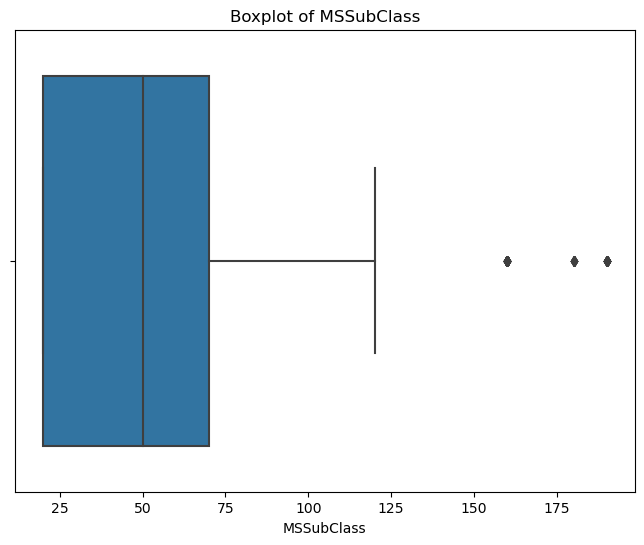

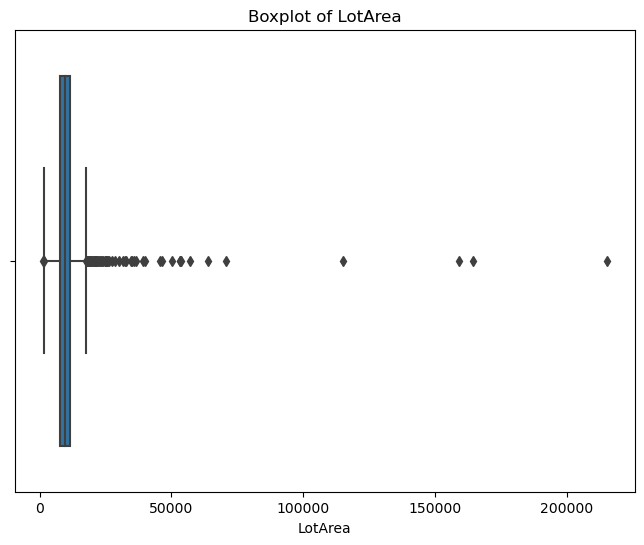

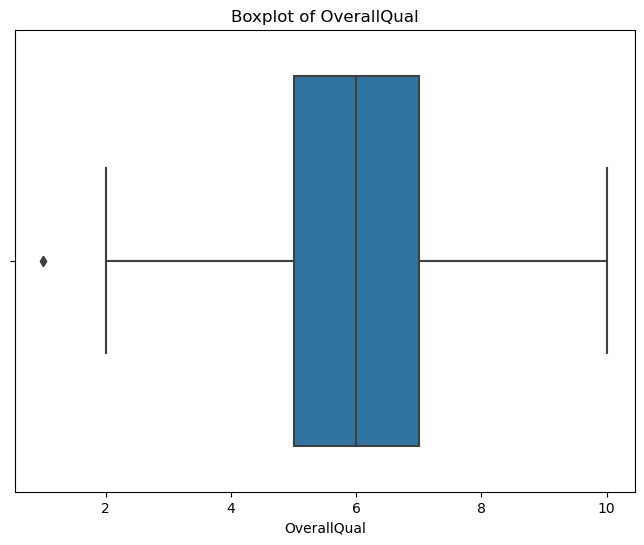

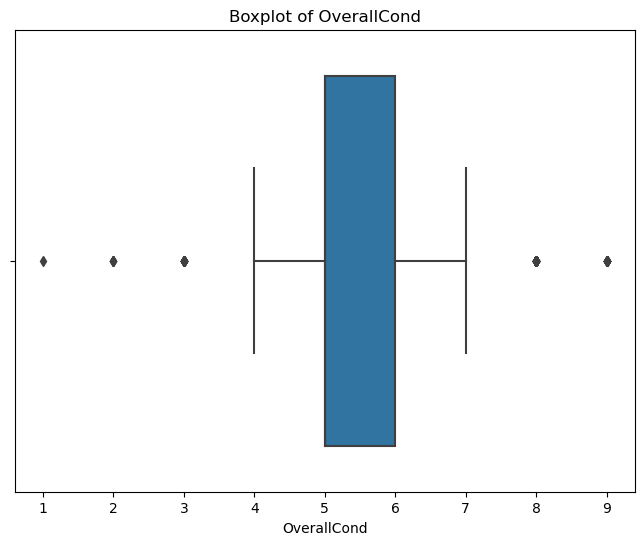

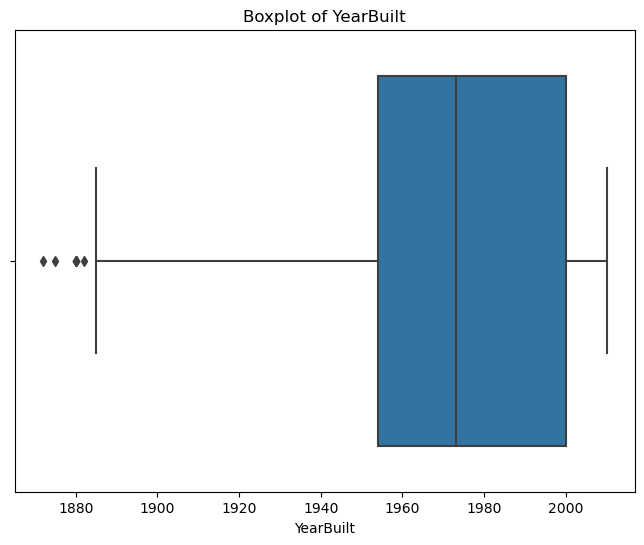

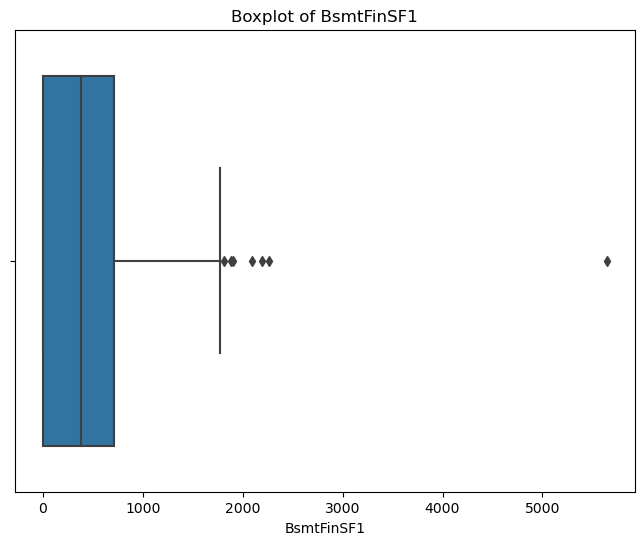

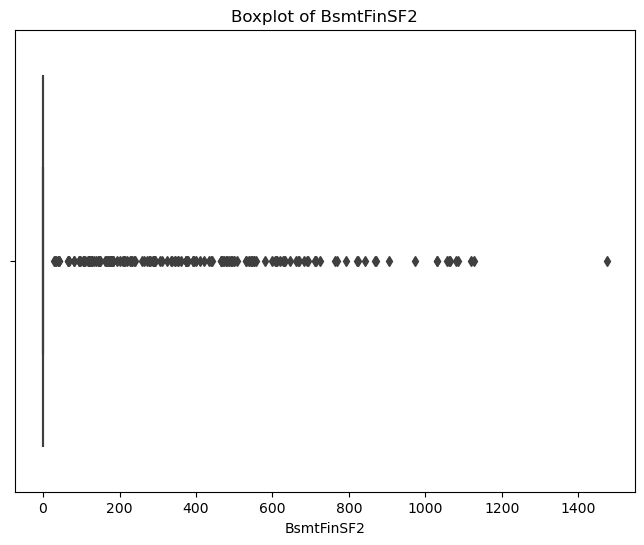

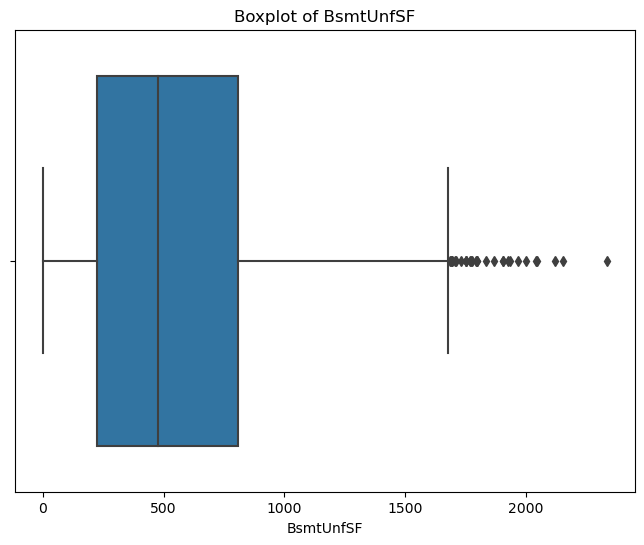

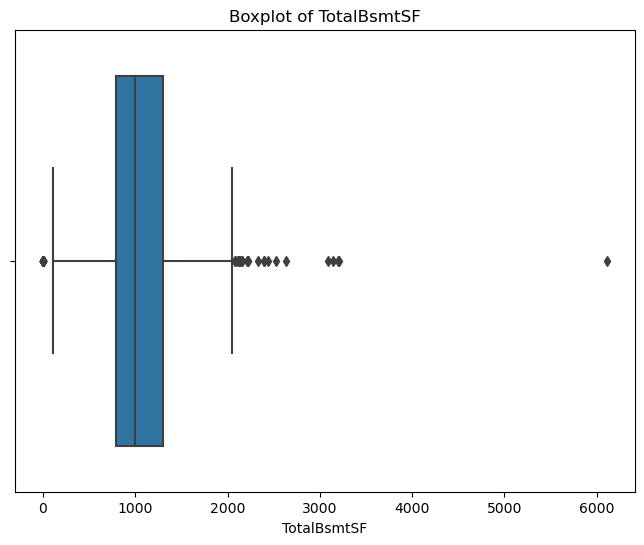

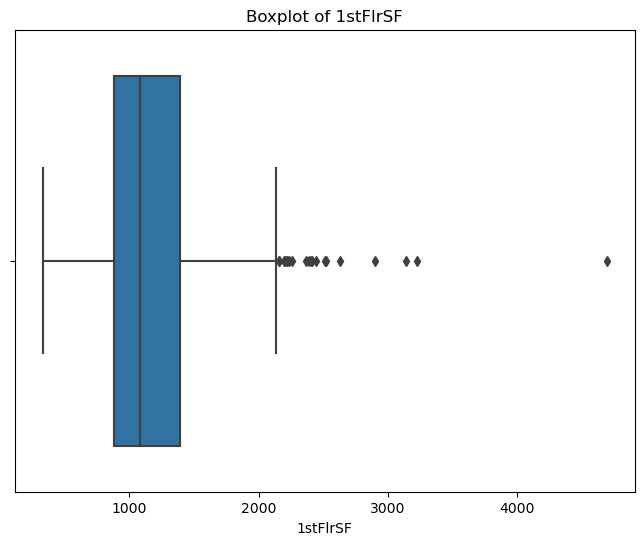

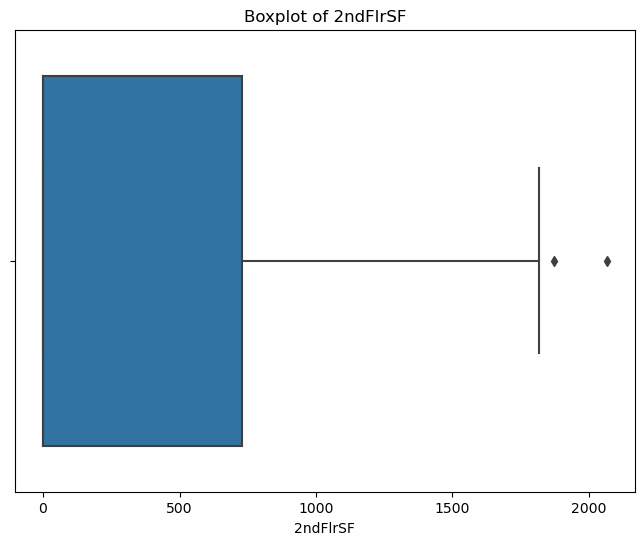

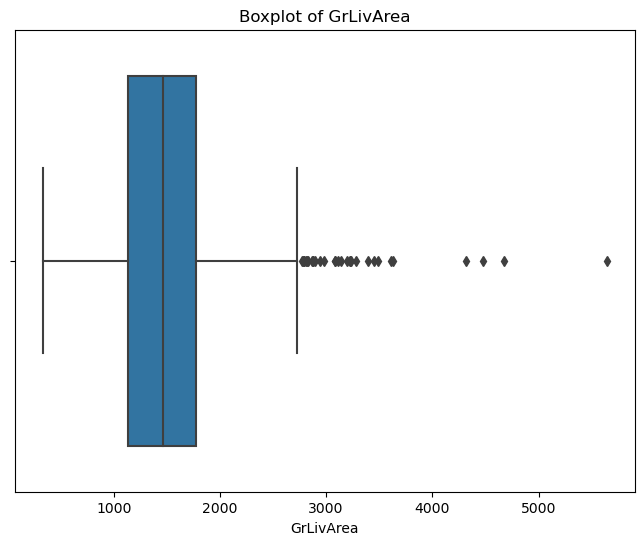

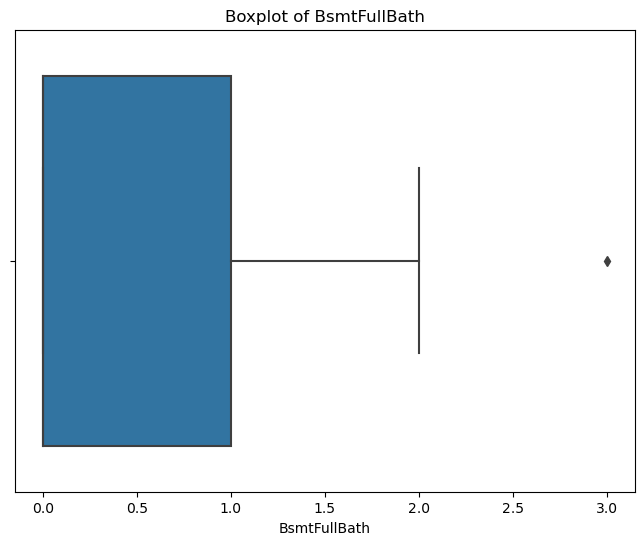

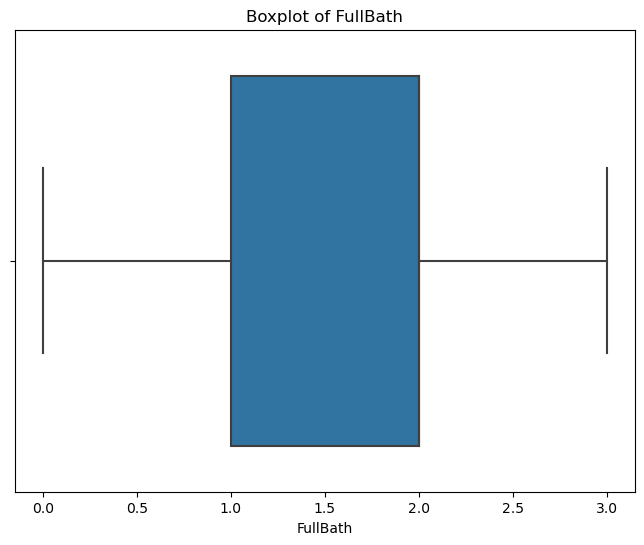

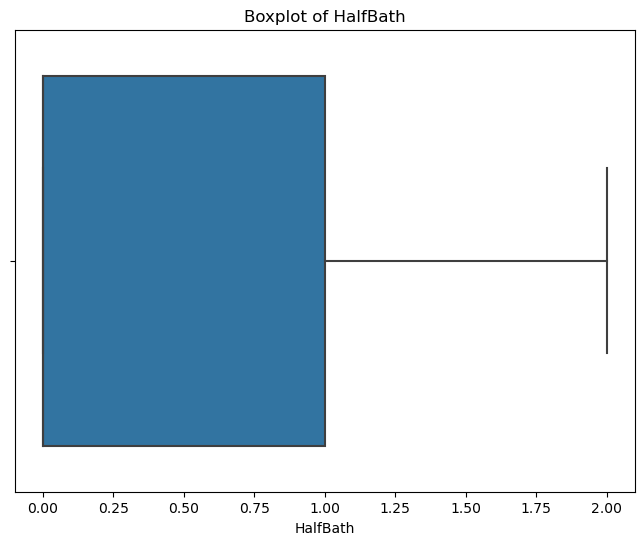

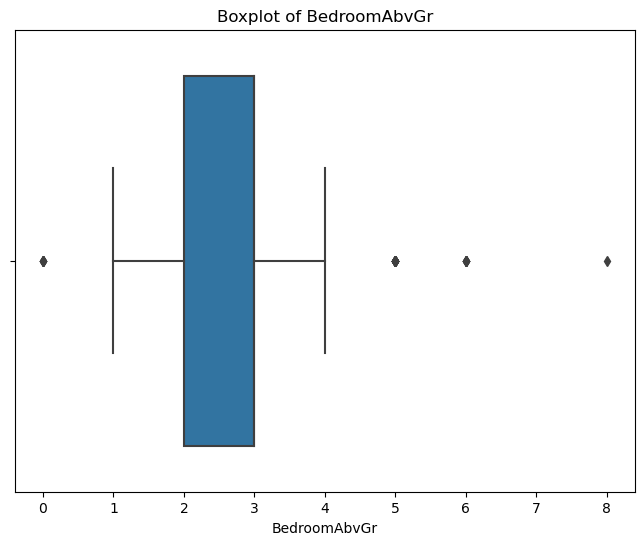

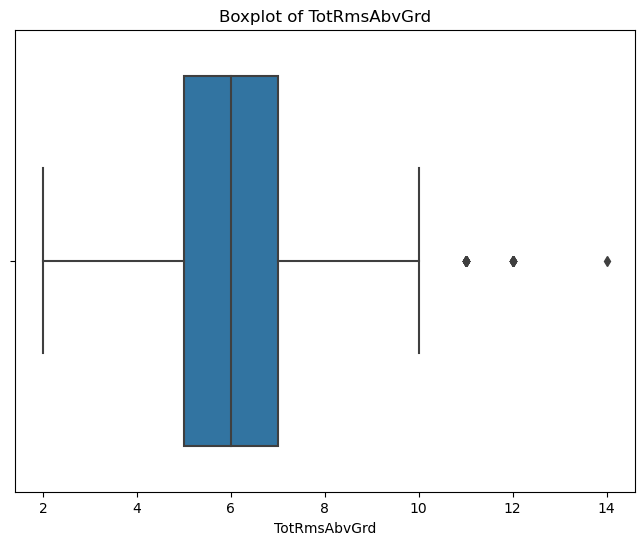

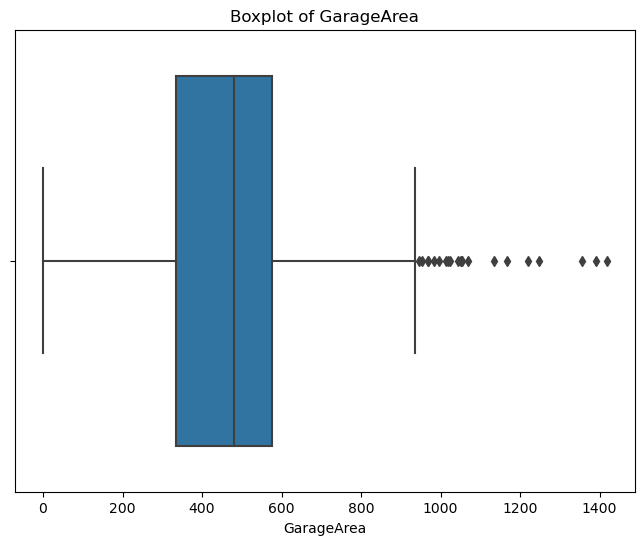

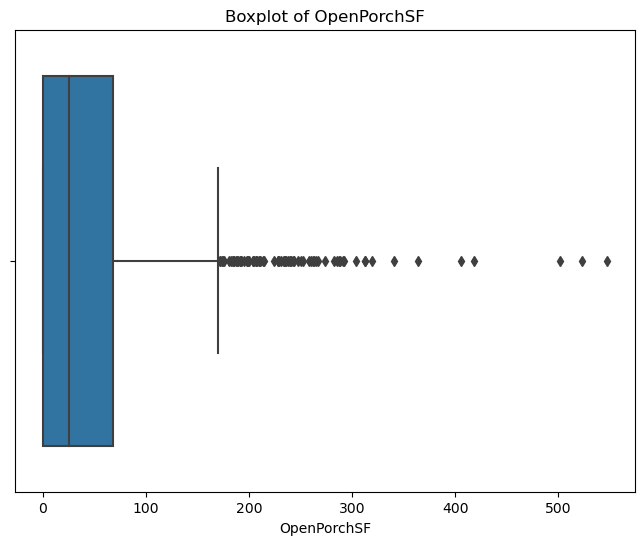

In [21]:
outliers_check(home_data_clean, 'MSSubClass')
outliers_check(home_data_clean, 'LotArea')
outliers_check(home_data_clean, 'OverallQual')
outliers_check(home_data_clean, 'OverallCond')
outliers_check(home_data_clean, 'YearBuilt')
outliers_check(home_data_clean, 'BsmtFinSF1')
outliers_check(home_data_clean, 'BsmtFinSF2')
outliers_check(home_data_clean, 'BsmtUnfSF')
outliers_check(home_data_clean, 'TotalBsmtSF')
outliers_check(home_data_clean, '1stFlrSF')
outliers_check(home_data_clean, '2ndFlrSF')
outliers_check(home_data_clean, 'GrLivArea')
outliers_check(home_data_clean, 'BsmtFullBath')
outliers_check(home_data_clean, 'FullBath')
outliers_check(home_data_clean, 'HalfBath')
outliers_check(home_data_clean, 'BedroomAbvGr')
outliers_check(home_data_clean, 'TotRmsAbvGrd')
outliers_check(home_data_clean, 'GarageArea')
outliers_check(home_data_clean, 'OpenPorchSF')

In [23]:
home_data_clean['MSSubClass'] = np.where(home_data_clean['MSSubClass'] > 155, np.nan, home_data_clean['MSSubClass'])
home_data_clean['MSSubClass'].fillna(home_data_clean['MSSubClass'].median(), inplace=True)

home_data_clean['LotArea'] = np.where(home_data_clean['LotArea'] > 20000, np.nan, home_data_clean['LotArea'])
home_data_clean['LotArea'].fillna(home_data_clean['LotArea'].median(), inplace=True)

home_data_clean['OverallQual'] = np.where(home_data_clean['OverallQual'] < 2, np.nan, home_data_clean['OverallQual'])
home_data_clean['OverallQual'].fillna(home_data_clean['OverallQual'].median(), inplace=True)

home_data_clean['YearBuilt'] = np.where(home_data_clean['YearBuilt'] < 1890, np.nan, home_data_clean['YearBuilt'])
home_data_clean['YearBuilt'].fillna(home_data_clean['YearBuilt'].median(), inplace=True)

home_data_clean['BsmtFinSF1'] = np.where(home_data_clean['BsmtFinSF1'] > 2000, np.nan, home_data_clean['BsmtFinSF1'])
home_data_clean['BsmtFinSF1'].fillna(home_data_clean['BsmtFinSF1'].median(), inplace=True)

home_data_clean['BsmtUnfSF'] = np.where(home_data_clean['BsmtUnfSF'] > 1400, np.nan, home_data_clean['BsmtUnfSF'])
home_data_clean['BsmtUnfSF'].fillna(home_data_clean['BsmtUnfSF'].median(), inplace=True)

home_data_clean['TotalBsmtSF'] = np.where(home_data_clean['TotalBsmtSF'] > 1700, np.nan, home_data_clean['TotalBsmtSF'])
home_data_clean['TotalBsmtSF'].fillna(home_data_clean['TotalBsmtSF'].median(), inplace=True)

home_data_clean['1stFlrSF'] = np.where(home_data_clean['1stFlrSF'] > 2200, np.nan, home_data_clean['1stFlrSF'])
home_data_clean['1stFlrSF'].fillna(home_data_clean['1stFlrSF'].median(), inplace=True)

home_data_clean['2ndFlrSF'] = np.where(home_data_clean['2ndFlrSF'] > 1800, np.nan, home_data_clean['2ndFlrSF'])
home_data_clean['2ndFlrSF'].fillna(home_data_clean['2ndFlrSF'].median(), inplace=True)

home_data_clean['GrLivArea'] = np.where(home_data_clean['GrLivArea'] > 2700, np.nan, home_data_clean['GrLivArea'])
home_data_clean['GrLivArea'].fillna(home_data_clean['GrLivArea'].median(), inplace=True)

home_data_clean['BsmtFullBath'] = np.where(home_data_clean['BsmtFullBath'] > 2.5, np.nan, home_data_clean['BsmtFullBath'])
home_data_clean['BsmtFullBath'].fillna(home_data_clean['BsmtFullBath'].median(), inplace=True)

home_data_clean['BedroomAbvGr'] = np.where(home_data_clean['BedroomAbvGr'] > 7, np.nan, home_data_clean['BedroomAbvGr'])
home_data_clean['BedroomAbvGr'].fillna(home_data_clean['BedroomAbvGr'].median(), inplace=True)

home_data_clean['TotRmsAbvGrd'] = np.where(home_data_clean['TotRmsAbvGrd'] > 10, np.nan, home_data_clean['TotRmsAbvGrd'])
home_data_clean['TotRmsAbvGrd'].fillna(home_data_clean['TotRmsAbvGrd'].median(), inplace=True)

home_data_clean['GarageArea'] = np.where(home_data_clean['GarageArea'] > 950, np.nan, home_data_clean['GarageArea'])
home_data_clean['GarageArea'].fillna(home_data_clean['GarageArea'].median(), inplace=True)

home_data_clean['OpenPorchSF'] = np.where(home_data_clean['OpenPorchSF'] > 350, np.nan, home_data_clean['OpenPorchSF'])
home_data_clean['OpenPorchSF'].fillna(home_data_clean['OpenPorchSF'].median(), inplace=True)

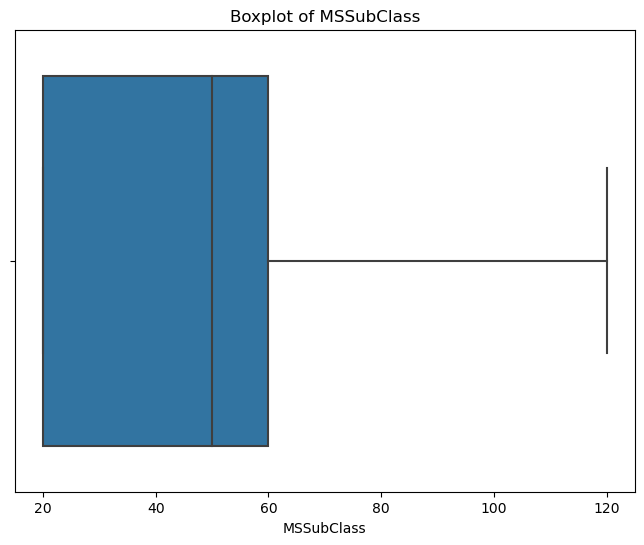

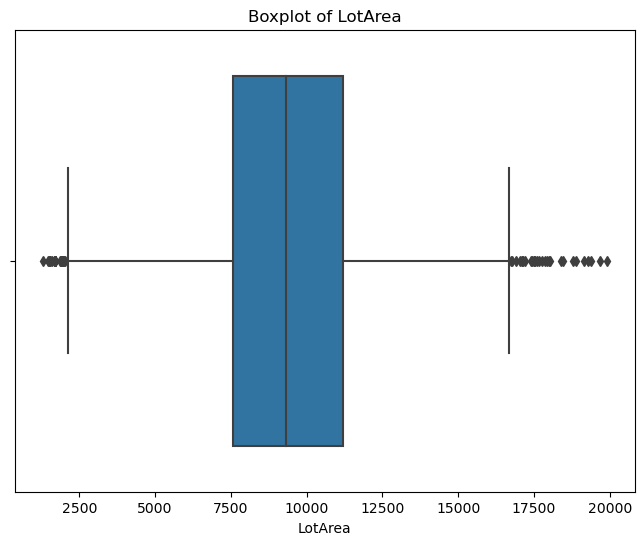

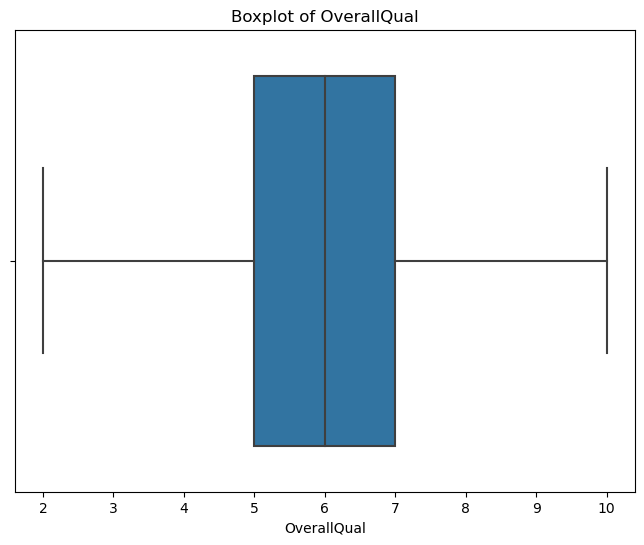

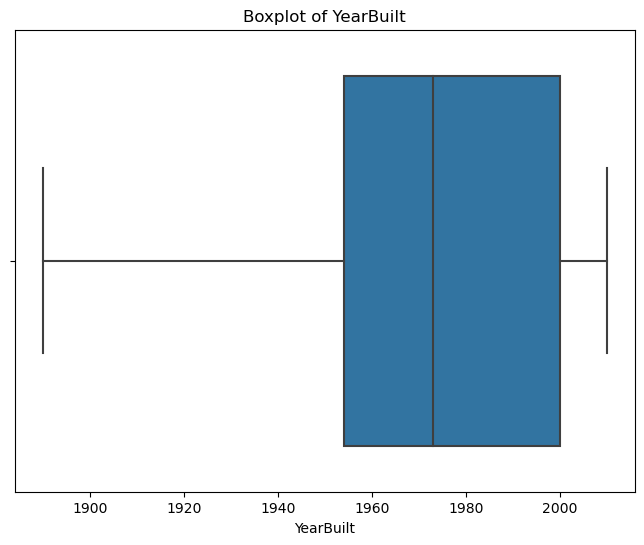

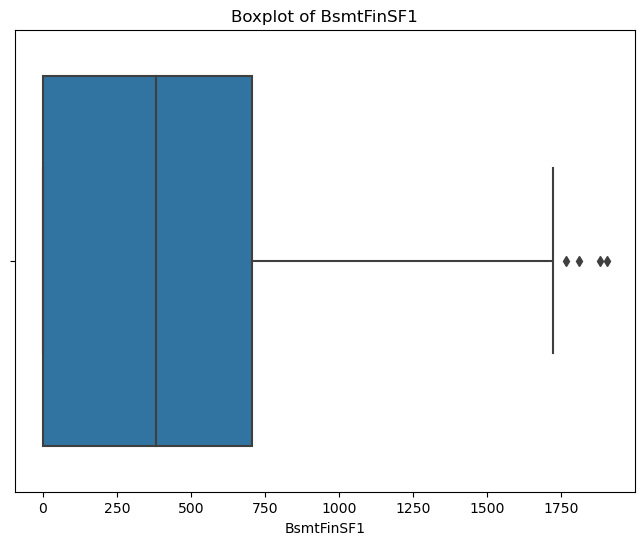

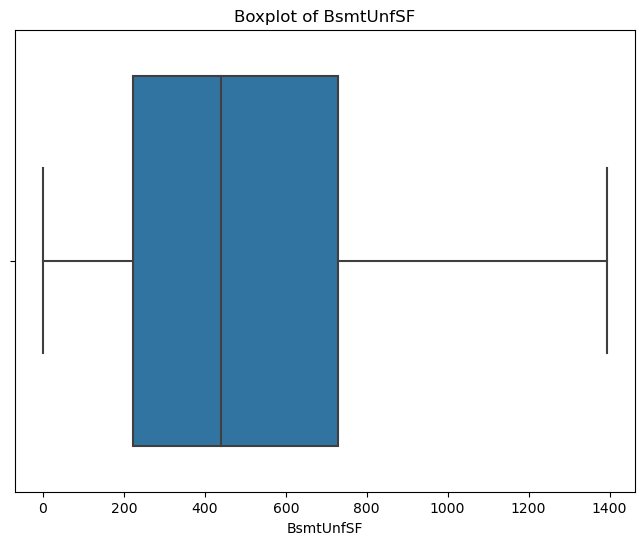

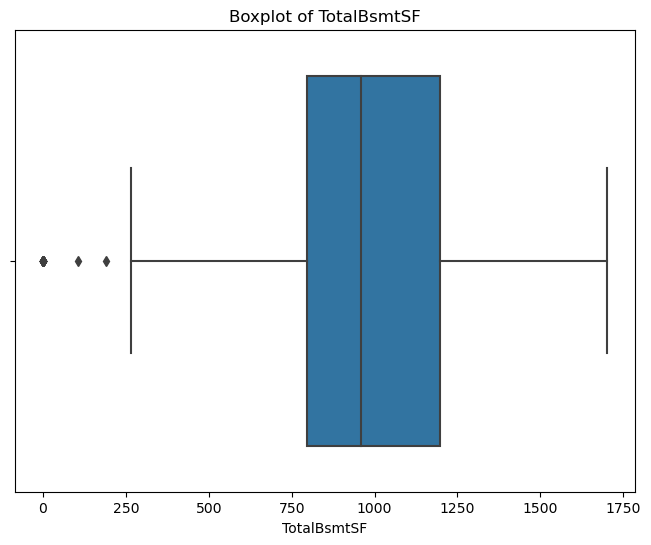

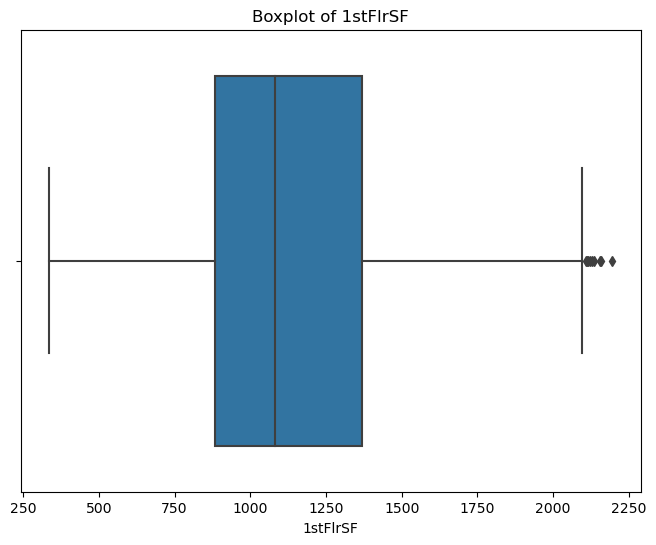

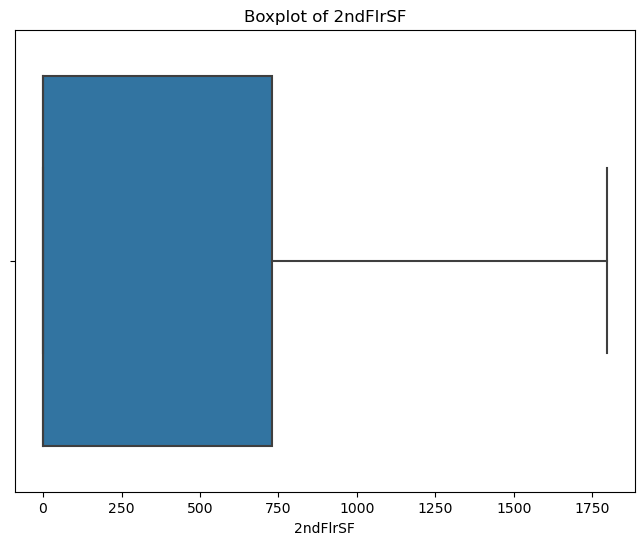

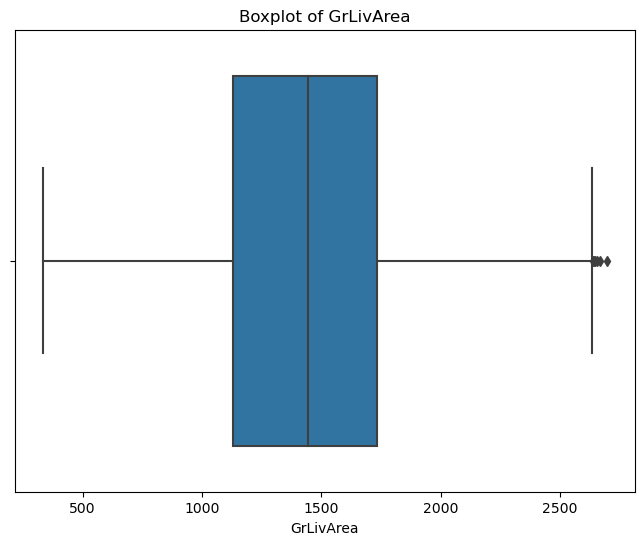

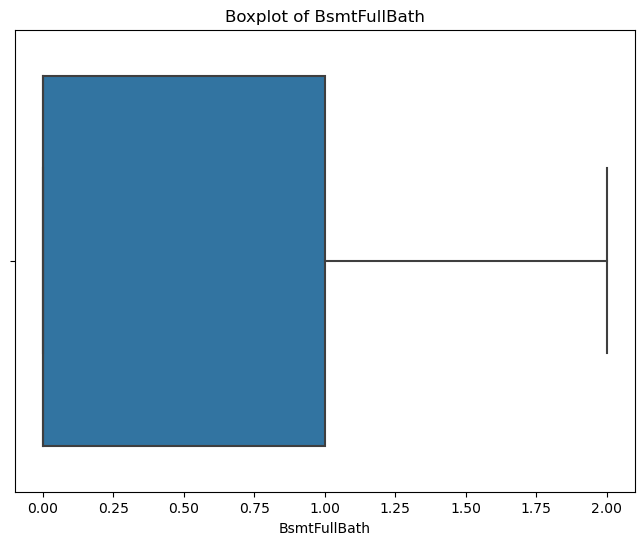

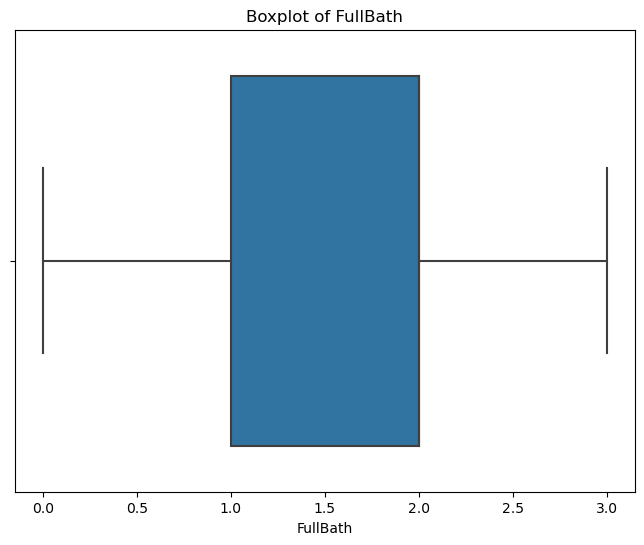

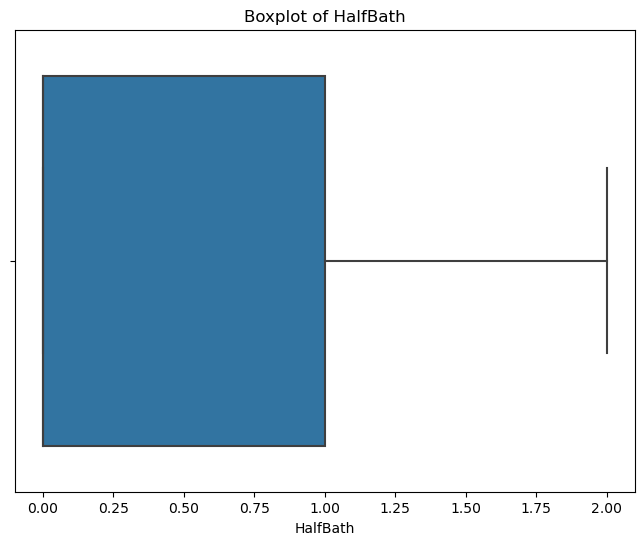

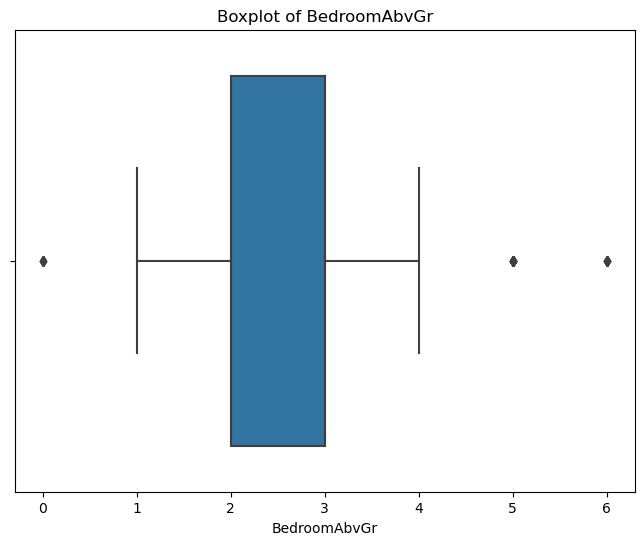

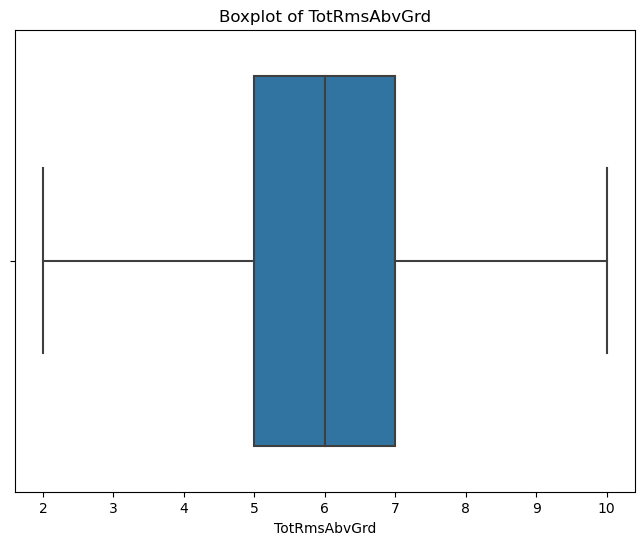

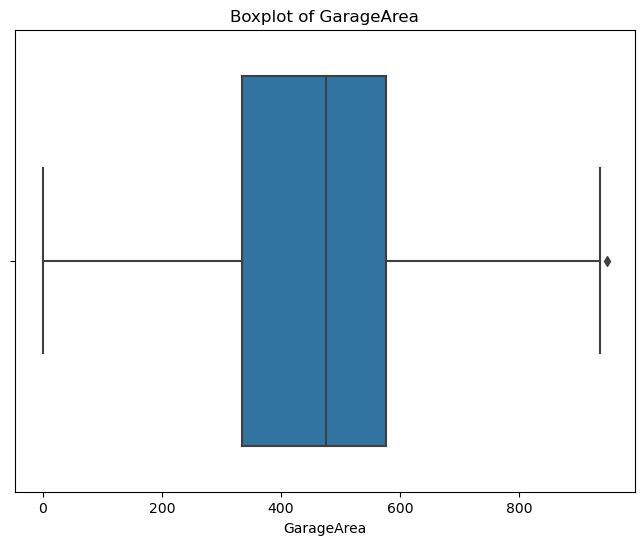

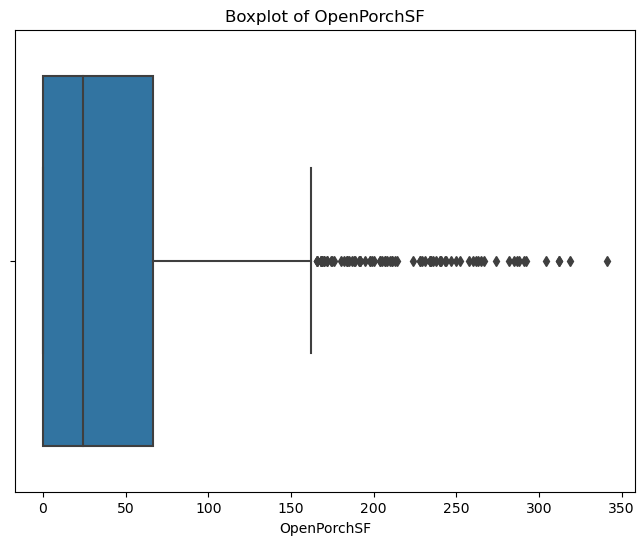

In [25]:
outliers_check(home_data_clean, 'MSSubClass')
outliers_check(home_data_clean, 'LotArea')
outliers_check(home_data_clean, 'OverallQual')
outliers_check(home_data_clean, 'YearBuilt')
outliers_check(home_data_clean, 'BsmtFinSF1')
outliers_check(home_data_clean, 'BsmtUnfSF')
outliers_check(home_data_clean, 'TotalBsmtSF')
outliers_check(home_data_clean, '1stFlrSF')
outliers_check(home_data_clean, '2ndFlrSF')
outliers_check(home_data_clean, 'GrLivArea')
outliers_check(home_data_clean, 'BsmtFullBath')
outliers_check(home_data_clean, 'FullBath')
outliers_check(home_data_clean, 'HalfBath')
outliers_check(home_data_clean, 'BedroomAbvGr')
outliers_check(home_data_clean, 'TotRmsAbvGrd')
outliers_check(home_data_clean, 'GarageArea')
outliers_check(home_data_clean, 'OpenPorchSF')

In [27]:
# Create cleaned X, y
X = home_data_clean.drop(['SalePrice'], axis=1)
y = home_data_clean.SalePrice

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

In [33]:
# group feature sets together

# numeric
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical
categorical_features = X_train.select_dtypes(include=['object']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
# setting up pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, random_state=9))
])

In [39]:
#split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=9)

#fit the data to the pipeline model
model_pipeline.fit(X_train, y_train)

#make predictions using the fitted model
y_val_pred = model_pipeline.predict(X_val)

#find the mae
mae = mean_absolute_error(y_val, y_val_pred)

#print the mae
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 17699.432350852272


In [43]:
# path to file you will use for predictions
test_data_path = 'test.csv'

# read test data file using pandas
X_test = pd.read_csv(test_data_path)

# make predictions on the test dataset
y_test_pred = model_pipeline.predict(X_test)

In [47]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': X_test.Id,
                       'SalePrice': y_test_pred})
output.to_csv('submission3.csv', index=False)

print("Submission file has been created successfully.")

Submission file has been created successfully.


# One Hot Encoding, Dummy variables

In [ ]:
#Clean up a few things
home_data_clean['MSZoning'] = home_data_clean['MSZoning'].replace('C (all)', 'C')


In [ ]:
home_data_clean.columns

In [ ]:
print("LotShape unique values:", sorted(home_data_clean['LotShape'].unique()))
print("LotConfig unique values:", sorted(home_data_clean['LotConfig'].unique()))
print("Neighborhood unique values:", sorted(home_data_clean['Neighborhood'].unique()))
print("HouseStyle unique values:", sorted(home_data_clean['HouseStyle'].unique()))
print("RoofStyle unique values:", sorted(home_data_clean['RoofStyle'].unique()))
print("Exterior1st unique values:", sorted(home_data_clean['Exterior1st'].unique()))
print("Exterior2nd unique values:", sorted(home_data_clean['Exterior2nd'].unique()))
print("MasVnrType unique values:", sorted(home_data_clean['MasVnrType'].unique()))
print("ExterQual unique values:", sorted(home_data_clean['ExterQual'].unique()))
print("Foundation unique values:", sorted(home_data_clean['Foundation'].unique()))
print("BsmtQual unique values:", sorted(home_data_clean['BsmtQual'].unique()))
print("BsmtExposure unique values:", sorted(home_data_clean['BsmtExposure'].unique()))
print("BsmtFinType1 unique values:", sorted(home_data_clean['BsmtFinType1'].unique()))
print("HeatingQC unique values:", sorted(home_data_clean['HeatingQC'].unique()))
print("CentralAir unique values:", sorted(home_data_clean['CentralAir'].unique()))
print("KitchenQual unique values:", sorted(home_data_clean['KitchenQual'].unique()))
print("GarageType unique values:", sorted(home_data_clean['GarageType'].unique()))
print("GarageFinish unique values:", sorted(home_data_clean['GarageFinish'].unique()))
print("SaleCondition unique values:", sorted(home_data_clean['SaleCondition'].unique()))

In [ ]:
#One-Hot Encoding for (Yes/No) variable
prefix_list = ['CentralAir']

prefix_dict = {'Y': 1, 'N': 0}

for col in prefix_list:
    home_data_clean[col] = home_data_clean[col].replace(prefix_dict)

In [ ]:
#get dummies for categorical variables

# Columns to one-hot encode
columns_to_encode = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                    'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']

# One-hot encode the selected columns
encoded_columns = pd.get_dummies(home_data_clean[columns_to_encode], 
                                 dtype=int)

In [ ]:
# Add new columns to existing DataFrame
home_data_encoded = pd.concat([home_data_clean, encoded_columns], axis=1)

In [ ]:
home_data_encoded.info()

In [ ]:
X = home_data_encoded.drop(['SalePrice'],1)
y = home_data_encoded.SalePrice

from sklearn.feature_selection import SelectKBest, f_classif
skbest = SelectKBest(score_func=f_classif, k='all')

X_new = skbest.fit_transform(X,y)

p_values = pd.DataFrame({'Feature': X.columns,
                        'p_value': skbest.pvalues_}).sort_values('p_value')
#p_values[p_values['p_value']<0.5]
features_to_keep = p_values['Feature'][p_values['p_value']<0.5]
print(features_to_keep)

In [ ]:
floats = home_data_encoded.select_dtypes(include=['float64']).columns.tolist()
integers = home_data_encoded.select_dtypes(include=['int64']).columns.tolist()
objects = home_data_encoded.select_dtypes(include=['object']).columns.tolist()

print(floats)
print("")
print(integers)
print("")
print(objects)

In [ ]:
X = home_data_encoded.drop(['SalePrice'],axis=1)
y = home_data_encoded.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

#Initial KNN classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Initial metrics to determine model accuracy. F1 score measures accuracy. 
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred))